In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, accuracy_score, classification_report, confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

random_state = 42
random.seed(random_state)
np.random.seed(random_state)



In [10]:
# --- 1. Load your data ---

with open('/content/drive/MyDrive/data/all_features_combined.pickle', 'rb') as f:
    all_features_combined_df = pickle.load(f)

with open('/content/drive/MyDrive/data/label_df_3.pickle', 'rb') as f:
    label_df_3 = pickle.load(f)
print(label_df_3['majority_label_3'].value_counts())
all_features_combined_df

majority_label_3
Active engagement          50
Intermittent engagement    32
Disengagement              20
Name: count, dtype: int64


,segment_id,AU_feature,dnn_feature,manual_feature,AU_feature_ref1,dnn_feature_ref1,manual_feature_ref1,AU_feature_ref2,dnn_feature_ref2,manual_feature_ref2
0,20210323-SP07F_clip_378_383,"[0.1441269841269841, 0.3001846627428381, 2.0, ...","[0.034613874, -0.22478016, 0.07269942, -0.3664...","[126.0, 12.609585210300457, 28.444309351049924...","[0.2984126984126984, 0.581175928886822, 3.0, 3...","[0.052595716, 0.06267054, -0.123, -0.41390204,...","[126.0, -23.982031966138386, 25.88700200677383...","[0.1348412698412698, 0.2224328541451883, 6.0, ...","[-0.299179, -0.36308083, -0.21096529, 0.192069...","[126.0, -3.078479217421869, 24.666117899730004..."
1,20210323-SP07F_clip_1113_1118,"[0.1441269841269841, 0.3001846627428381, 2.0, ...","[0.061545894, -0.25375453, -0.04545928, -0.193...","[125.0, 8.967601040954058, 26.538118969393903,...","[0.053015873015873, 0.0807590969862327, 0.0, -...","[0.07015944, 0.020164885, -0.05986896, -0.2490...","[126.0, -42.03995220760016, 27.480209132219365...","[0.2984126984126984, 0.581175928886822, 3.0, 3...","[0.027060911, -0.08274244, 0.0400747, 0.069514...","[126.0, -1.0203919666780152, 26.30721485617076..."
2,20210323-SP07F_clip_1074_1079,"[0.1441269841269841, 0.3001846627428381, 2.0, ...","[-0.009148686, -0.12560014, -0.08919125, -0.21...","[121.0, 16.190503685472198, 26.270694432031604...","[0.1348412698412698, 0.2224328541451883, 6.0, ...","[-0.299179, -0.36308083, -0.21096529, 0.192069...","[126.0, 22.120582578287895, 22.3158813791212, ...","[0.2984126984126984, 0.581175928886822, 3.0, 3...","[0.037613317, -0.005479859, 0.007825111, -0.00...","[126.0, -3.270940913024445, 27.572546816724127..."
3,20210323-SP07F_clip_1182_1187,"[0.1441269841269841, 0.3001846627428381, 2.0, ...","[-0.041140895, -0.088186085, 0.0039451574, -0....","[89.0, 4.982063863359799, 30.799108675192933, ...","[0.1348412698412698, 0.2224328541451883, 6.0, ...","[-0.299179, -0.36308083, -0.21096529, 0.192069...","[126.0, 17.31989267131847, 23.09387887171484, ...","[0.2984126984126984, 0.581175928886822, 3.0, 3...","[0.15345049, 0.123038046, -0.33340588, -0.4496...","[126.0, 6.043316631352067, 23.236435152206642,..."
4,20210323-SP07F_clip_255_260,"[0.1441269841269841, 0.3001846627428381, 2.0, ...","[-0.017098123, -0.22169487, 0.061171174, -0.33...","[122.0, 12.994270436686323, 28.811799580626968...","[0.088015873015873, 0.1128752928945557, 0.0, -...","[-0.018141264, -0.13290454, 0.06462509, 0.2290...","[126.0, 46.44568364985898, 36.5801491866292, 1...","[0.2984126984126984, 0.581175928886822, 3.0, 3...","[0.102719806, 0.10402108, -0.085270084, -0.421...","[126.0, -18.488218431374484, 27.66351393040864..."
...,...,...,...,...,...,...,...,...,...,...
626,20220916-SP07F_clip_170_175,"[0.2068253968253968, 0.4341200770176864, 4.0, ...","[-0.08298848, -0.21334194, -0.23492509, -0.169...","[99.0, 3.015383967411516, 32.090275432264924, ...","[0.0781746031746031, 0.105666651644884, 0.0, -...","[-0.14228053, -0.19247176, -0.21233575, -0.017...","[126.0, -1.5842548036780788, 25.78576166560231...","[0.0775396825396825, 0.1268806463283444, 1.0, ...","[0.09140542, 0.11850408, -0.22142988, -0.53438...","[126.0, 1.1535208357646158, 24.580112330111366..."
627,20220916-SP07F_clip_0_5,"[0.2068253968253968, 0.4341200770176864, 4.0, ...","[-0.0563802, -0.22218841, -0.24426143, -0.1588...","[119.0, 12.12459926234018, 30.185529291105983,...","[0.0775396825396825, 0.1268806463283444, 1.0, ...","[-0.15170558, -0.19269006, -0.2064976, -0.1806...","[121.0, 0.7987719690956768, 28.6503157046054, ...","[0.0775396825396825, 0.1268806463283444, 1.0, ...","[0.054450084, -0.08387012, -0.12646388, -0.310...","[121.0, -7.012214102436831, 23.61696465074466,..."
628,20220916-SP07F_clip_235_240,"[0.2068253968253968, 0.4341200770176864, 4.0, ...","[-0.10170282, -0.21903856, -0.11246258, -0.036...","[125.0, 17.00454538866136, 31.420981086640406,...","[0.0775396825396825, 0.1268806463283444, 1.0, ...","[-0.044145454, -0.11295659, -0.00957068, -0.20...","[126.0, -1.2291

Original DNN features shape: (1647, 512)
PCA transformed DNN features shape: (1647, 100)


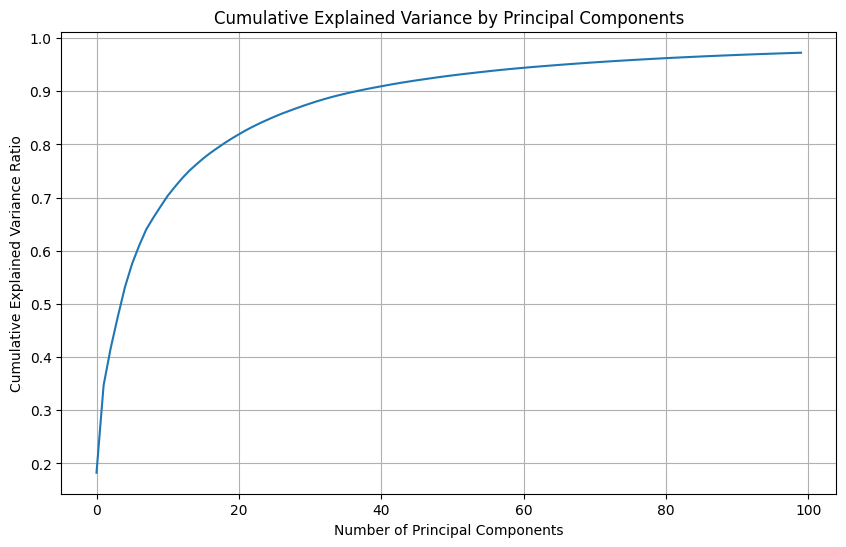

In [11]:
# prompt: apply pca for all_features_combined_df dnn_features

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming 'dnn_features' is a column in all_features_combined_df that contains the DNN features
# If it's a separate variable or needs different handling, adjust accordingly.

# Extract the DNN features
dnn_features = all_features_combined_df['dnn_feature'].tolist() +all_features_combined_df['dnn_feature_ref1'].tolist() +all_features_combined_df['dnn_feature_ref2'].tolist() # Convert to list of arrays
dnn_features = np.array(dnn_features) # Convert list of arrays to a single numpy array

# Standardize the data before applying PCA
scaler = StandardScaler()
dnn_features_scaled = scaler.fit_transform(dnn_features)

# Apply PCA
# You can choose the number of components, here we'll keep all for now, or specify a number (e.g., n_components=100)
pca = PCA(100)
dnn_features_pca = pca.fit_transform(dnn_features)

# You can now use dnn_features_pca for further analysis or store it
print("Original DNN features shape:", dnn_features.shape)
print("PCA transformed DNN features shape:", dnn_features_pca.shape)

# Optional: Analyze the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
# print("Explained variance ratio:", explained_variance_ratio)

# Optional: Plot explained variance to help decide on the number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

all_features_combined_df['dnn_feature_pca'] = dnn_features_pca.tolist()[:len(all_features_combined_df)]
all_features_combined_df['dnn_feature_pca_ref1'] = dnn_features_pca.tolist()[len(all_features_combined_df):len(all_features_combined_df)*2]
all_features_combined_df['dnn_feature_pca_ref2'] = dnn_features_pca.tolist()[len(all_features_combined_df)*2:]

Original AU features shape: (1647, 85)
PCA transformed AU features shape: (1647, 20)


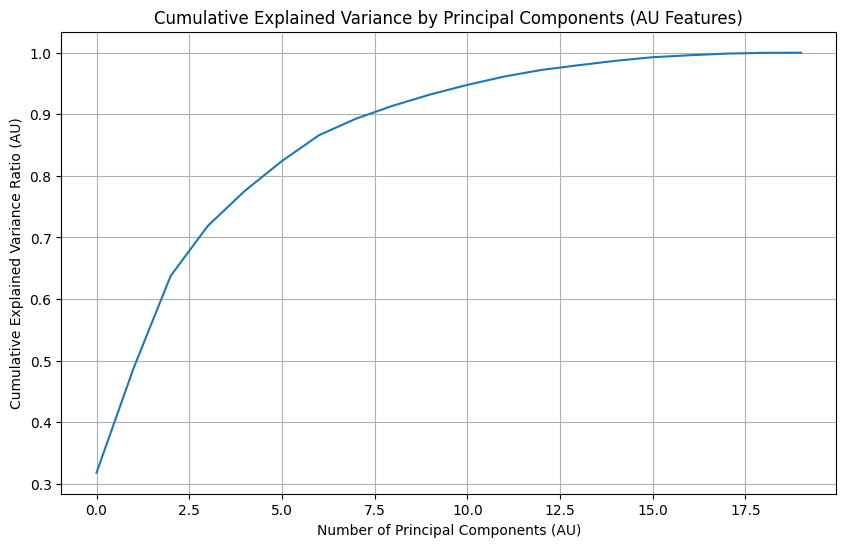

AU PCA features added to DataFrame.


In [12]:
# prompt: apply pca for au features

import matplotlib.pyplot as plt
import numpy as np
# --- Apply PCA for AU features ---

# Extract the AU features
# Assuming 'au_features' and similar columns exist in all_features_combined_df
# You might need to adjust the column names based on your dataframe structure
au_features_cols = ['AU_feature', 'AU_feature_ref1', 'AU_feature_ref2'] # Adjust column names as needed
au_features_list = []
for col in au_features_cols:
    if col in all_features_combined_df.columns:
        # Assuming AU features are stored as lists or arrays in the DataFrame cells
        au_features_list.extend(all_features_combined_df[col].tolist())
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")

if not au_features_list:
    print("Error: No AU feature columns found or they are empty.")
else:
    au_features = np.array(au_features_list)

    # Standardize the data before applying PCA
    scaler_au = StandardScaler()
    au_features_scaled = scaler_au.fit_transform(au_features)

    # Apply PCA for AU features
    # You can choose the number of components, e.g., 20 for AU features
    pca_au = PCA(n_components=20) # Adjust n_components as needed
    au_features_pca = pca_au.fit_transform(au_features_scaled)

    # Print shapes
    print("Original AU features shape:", au_features.shape)
    print("PCA transformed AU features shape:", au_features_pca.shape)

    # Optional: Analyze the explained variance ratio for AU features
    explained_variance_ratio_au = pca_au.explained_variance_ratio_
    # print("Explained variance ratio for AU features:", explained_variance_ratio_au)

    # Optional: Plot explained variance for AU features
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(explained_variance_ratio_au))
    plt.xlabel('Number of Principal Components (AU)')
    plt.ylabel('Cumulative Explained Variance Ratio (AU)')
    plt.title('Cumulative Explained Variance by Principal Components (AU Features)')
    plt.grid(True)
    plt.show()

    # Add PCA transformed AU features back to the DataFrame
    # Need to split the combined PCA results back to original reference groups
    num_samples_per_ref = len(all_features_combined_df)
    all_features_combined_df['au_features_pca'] = au_features_pca[:num_samples_per_ref].tolist()
    if len(au_features_cols) > 1:
        all_features_combined_df['au_features_pca_ref1'] = au_features_pca[num_samples_per_ref:num_samples_per_ref*2].tolist()
    if len(au_features_cols) > 2:
        all_features_combined_df['au_features_pca_ref2'] = au_features_pca[num_samples_per_ref*2:].tolist()

    print("AU PCA features added to DataFrame.")

In [13]:
# prompt: calucate alignment_feature that contain cosin similarity between each pari (au_features_pca, au_features_pca_ref1, au_features_pca_ref2) , (dnn_feature_pca, dnn_feature_pca_ref1, dnn_feature_pca_ref2), abs of sub  element wise manual_feature

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_similarity(feature1, feature2):
  """Calculates cosine similarity between two feature vectors."""
  # Ensure features are numpy arrays for calculation
  feature1 = np.array(feature1)
  feature2 = np.array(feature2)

  # Reshape for cosine_similarity if they are 1D
  if feature1.ndim == 1:
      feature1 = feature1.reshape(1, -1)
  if feature2.ndim == 1:
      feature2 = feature2.reshape(1, -1)

  # Handle cases where one of the features might be empty or invalid after processing
  if feature1.size == 0 or feature2.size == 0:
      return np.nan # Return NaN for undefined similarity

  return cosine_similarity(feature1, feature2)[0][0]

# Calculate alignment features
alignment_features = pd.DataFrame()

# Cosine similarity for AU features
if 'au_features_pca' in all_features_combined_df.columns and \
   'au_features_pca_ref1' in all_features_combined_df.columns and \
   'au_features_pca_ref2' in all_features_combined_df.columns:
    alignment_features['au_align_ref1'] = all_features_combined_df.apply(
        lambda row: calculate_cosine_similarity(row['au_features_pca'], row['au_features_pca_ref1']), axis=1
    )
    alignment_features['au_align_ref2'] = all_features_combined_df.apply(
        lambda row: calculate_cosine_similarity(row['au_features_pca'], row['au_features_pca_ref2']), axis=1
    )
    alignment_features['au_align_ref1_ref2'] = all_features_combined_df.apply(
        lambda row: calculate_cosine_similarity(row['au_features_pca_ref1'], row['au_features_pca_ref2']), axis=1
    )

# Cosine similarity for DNN features
if 'dnn_feature_pca' in all_features_combined_df.columns and \
   'dnn_feature_pca_ref1' in all_features_combined_df.columns and \
   'dnn_feature_pca_ref2' in all_features_combined_df.columns:
    alignment_features['dnn_align_ref1'] = all_features_combined_df.apply(
        lambda row: calculate_cosine_similarity(row['dnn_feature_pca'], row['dnn_feature_pca_ref1']), axis=1
    )
    alignment_features['dnn_align_ref2'] = all_features_combined_df.apply(
        lambda row: calculate_cosine_similarity(row['dnn_feature_pca'], row['dnn_feature_pca_ref2']), axis=1
    )
    alignment_features['dnn_align_ref1_ref2'] = all_features_combined_df.apply(
        lambda row: calculate_cosine_similarity(row['dnn_feature_pca_ref1'], row['dnn_feature_pca_ref2']), axis=1
    )

# Absolute difference for manual features
# Assuming 'manual_feature', 'manual_feature_ref1', 'manual_feature_ref2' exist and are numeric or lists of numerics
manual_features_cols = ['manual_feature', 'manual_feature_ref1', 'manual_feature_ref2'] # Adjust as needed

if all(col in all_features_combined_df.columns for col in manual_features_cols):
    alignment_features['manual_diff_ref1'] = all_features_combined_df.apply(
        lambda row: np.abs(np.array(row['manual_feature']) - np.array(row['manual_feature_ref1'])), axis=1
    )
    alignment_features['manual_diff_ref2'] = all_features_combined_df.apply(
        lambda row: np.abs(np.array(row['manual_feature']) - np.array(row['manual_feature_ref2'])), axis=1
    )
    alignment_features['manual_diff_ref1_ref2'] = all_features_combined_df.apply(
        lambda row: np.abs(np.array(row['manual_feature_ref1']) - np.array(row['manual_feature_ref2'])), axis=1
    )

# Display the resulting alignment features dataframe
print("\nAlignment Features DataFrame:")
print(alignment_features.columns)

# You can merge this alignment_features dataframe back to your main dataframe if needed
all_features_combined_df = pd.concat([all_features_combined_df, alignment_features], axis=1)
print("\nCombined DataFrame with Alignment Features:")
all_features_combined_df.head()


Alignment Features DataFrame:
Index(['au_align_ref1', 'au_align_ref2', 'au_align_ref1_ref2',
       'dnn_align_ref1', 'dnn_align_ref2', 'dnn_align_ref1_ref2',
       'manual_diff_ref1', 'manual_diff_ref2', 'manual_diff_ref1_ref2'],
      dtype='object')

Combined DataFrame with Alignment Features:


,segment_id,AU_feature,dnn_feature,manual_feature,AU_feature_ref1,dnn_feature_ref1,manual_feature_ref1,AU_feature_ref2,dnn_feature_ref2,manual_feature_ref2,...,au_features_pca_ref2,au_align_ref1,au_align_ref2,au_align_ref1_ref2,dnn_align_ref1,dnn_align_ref2,dnn_align_ref1_ref2,manual_diff_ref1,manual_diff_ref2,manual_diff_ref1_ref2
0,20210323-SP07F_clip_378_383,"[0.1441269841269841, 0.3001846627428381, 2.0, ...","[0.034613874, -0.22478016, 0.07269942, -0.3664...","[126.0, 12.609585210300457, 28.444309351049924...","[0.2984126984126984, 0.581175928886822, 3.0, 3...","[0.052595716, 0.06267054, -0.123, -0.41390204,...","[126.0, -23.982031966138386, 25.88700200677383...","[0.1348412698412698, 0.2224328541451883, 6.0, ...","[-0.299179, -0.36308083, -0.21096529, 0.192069...","[126.0, -3.078479217421869, 24.666117899730004...",...,"[-5.15554012622397, 6.467380741376181, -6.1970...",0.410391,0.339832,0.076046,0.205785,-0.205080,-0.244327,"[0.0, 36.591617176438845, 2.55730734427609, 0....","[0.0, 15.688064427722326, 3.7781914513199197, ...","[0.0, 20.903552748716518, 1.2208841070438297, ..."
1,20210323-SP07F_clip_1113_1118,"[0.1441269841269841, 0.3001846627428381, 2.0, ...","[0.061545894, -0.25375453, -0.04545928, -0.193...","[125.0, 8.967601040954058, 26.538118969393903,...","[0.053015873015873, 0.0807590969862327, 0.0, -...","[0.07015944, 0.020164885, -0.05986896, -0.2490...","[126.0, -42.03995220760016, 27.480209132219365...","[0.2984126984126984, 0.581175928886822, 3.0, 3...","[0.027060911, -0.08274244, 0.0400747, 0.069514...","[126.0, -1.0203919666780152, 26.30721485617076...",...,"[-8.30835069072872, 1.3934146058457366, 3.2652...",0.080184,0.410391,-0.126677,0.195923,-0.077699,-0.201347,"[1.0, 51.00755324855422, 0.9420901628254619, 3...","[1.0, 9.987993007632074, 0.23090411322313642, ...","[0.0, 41.01956024092215, 1.1729942760485983, 3..."
2,20210323-SP07F_clip_1074_1079,"[0.1441269841269841, 0.3001846627428381, 2.0, ...","[-0.009148686, -0.12560014, -0.08919125, -0.21...","[121.0, 16.190503685472198, 26.270694432031604...","[0.1348412698412698, 0.2224328541451883, 6.0, ...","[-0.299179, -0.36308083, -0.21096529, 0.192069...","[126.0, 22.120582578287895, 22.3158813791212, ...","[0.2984126984126984, 0.581175928886822, 3.0, 3...","[0.037613317, -0.005479859, 0.007825111, -0.00...","[126.0, -3.270940913024445, 27.572546816724127...",...,"[-8.30835069072872, 1.3934146058457366, 3.2652...",0.339832,0.410391,0.076046,-0.184231,0.141752,0.169169,"[5.0, 5.930078892815697, 3.954813052910403, 10...","[5.0, 19.46144459849664, 1.3018523846925234, 3...","[0.0, 25.39152349131234, 5.256665437602926, 34..."
3,20210323-SP07F_clip_1182_1187,"[0.1441269841269841, 0.3001846627428381, 2.0, ...","[-0.041140895, -0.088186085, 0.0039451574, -0....","[89.0, 4.982063863359799, 30.799108675192933, ...","[0.1348412698412698, 0.2224328541451883, 6.0, ...","[-0.299179, -0.36308083, -0.21096529, 0.192069...","[126.0, 17.31989267131847, 23.09387887171484, ...","[0.2984126984126984, 0.581175928886822, 3.0, 3...","[0.15345049, 0.123038046, -0.33340588, -0.4496...","[126.0, 6.043316631352067, 23.236435152206642,...",...,"[-8.30835069072872, 1.3934146058457366, 3.2652...",0.339832,0.410391,0.076046,-0.181620,0.198327,-0.260443,"[37.0, 12.337828807958672, 7.705229803478094, ...","[37.0, 1.0612527679922685, 7.562673522986291, ...","[0.0, 11.276576039966404, 0.14255628049180302,..."
4,20210323-SP07F_clip_255_260,"[0.1441269841269841, 0.3001846627428381, 2.0, ...","[-0.017098123, -0.22169487, 0.061171174, -0.33...","[122.0, 12.994270436686323, 28.811799580626968...","[0.088015873015873, 0.1128752928945557, 0.0, -...","[-0.018141264, -0.13290454, 0.06462509, 0.2290...","[126.0, 46.44568364985898, 36.5801491866292, 1...","[0.2984126984126984, 0.581175928886822, 3.0, 3...","[0.102719806, 0.10402108, -0.085270084, -0.421...","[126.0, -18.488218431374484, 27.66351393040864...",...,"[-8.30835069072872, 1.3934146058457366, 3.2652...",0.491463,0.410391,0.271017,0.040691,0.2634

In [14]:
print(f"Total segments in all_features_combined_df: {len(all_features_combined_df)}")
print(f"Total segments in label_df_3 (test set): {len(label_df_3)}")

# --- 2. Split Data: Training (for clustering) and Test sets ---
test_segment_ids = label_df_3['segment_id'].unique()
train_df = all_features_combined_df[~all_features_combined_df['segment_id'].isin(test_segment_ids)].copy()
test_df = all_features_combined_df[all_features_combined_df['segment_id'].isin(test_segment_ids)].copy() # Not used for clustering
train_df = train_df.reset_index()
test_df = test_df.reset_index()
print(f"Number of segments for clustering (training): {len(train_df)}")
print(f"Number of segments for testing: {len(test_df)}")


# --- 3. Prepare F_target (features for the target person) for clustering ---
# IMPORTANT: This assumes your feature columns contain lists/arrays of numbers.
# If they are strings representing lists, you'll need to convert them first, e.g., using ast.literal_eval
# Example: train_df['AU_feature'] = train_df['AU_feature'].apply(ast.literal_eval)

def extract_and_combine_features(df, feature_cols):
    feature_dfs = []
    for col in feature_cols:
        # Expand list/array in cell into multiple columns
        # print(f"Processing column: {col}", df[col])
        # print()
        expanded_features = pd.DataFrame(df[col].tolist(), index=df.index)
        # Add prefix to avoid column name collisions if features within lists are not uniquely named
        expanded_features = expanded_features.add_prefix(f'{col}_')
        feature_dfs.append(expanded_features)
    combined = pd.concat(feature_dfs, axis=1)
    # Ensure all are numeric, fill NaNs if any (e.g. from unequal list lengths if not padded)
    return combined.apply(pd.to_numeric, errors='coerce').fillna(0)

target_feature_columns = ['au_features_pca', 'dnn_feature_pca', 'manual_feature'] + ['au_align_ref1', 'au_align_ref2', 'au_align_ref1_ref2',
       'dnn_align_ref1', 'dnn_align_ref2', 'dnn_align_ref1_ref2',
       'manual_diff_ref1', 'manual_diff_ref2', 'manual_diff_ref1_ref2']
# target_feature_columns = ['AU_feature', 'dnn_feature', 'manual_feature']
# target_feature_columns = ['AU_feature', 'manual_feature']
X_train = extract_and_combine_features(train_df, target_feature_columns)

print(f"Shape of training feature matrix X_train: {X_train.shape}")

# --- 4. Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# --- Helper function to get segments for manual labeling ---
def get_segments_for_manual_labeling(df_with_segment_ids, cluster_labels, n_segments_per_cluster=3):
    """Gets segment_ids for manual labeling from each cluster."""
    df_with_segment_ids['cluster'] = cluster_labels
    segments_to_label = {}
    for cluster_id in sorted(df_with_segment_ids['cluster'].unique()):
        cluster_segments = df_with_segment_ids[df_with_segment_ids['cluster'] == cluster_id]['segment_id']
        # Take a sample (or first N if you want to be deterministic and data is not ordered meaningfully)
        segments_to_label[cluster_id] = cluster_segments.sample(min(n_segments_per_cluster, len(cluster_segments)), random_state=42).tolist()
    return segments_to_label


Total segments in all_features_combined_df: 549
Total segments in label_df_3 (test set): 102
Number of segments for clustering (training): 460
Number of segments for testing: 89
Shape of training feature matrix X_train: (460, 310)


In [15]:
# prompt: write python function to convert 20211007-SP07F_clip_2652_2657  to /content/drive/MyDrive/filtered_clips/20211007-SP07F/clip_2652_2657.mp4

def segment_id_to_filepath(segment_id):
  """
  Converts a segment ID string to a file path in Google Drive.

  Args:
    segment_id: The input segment ID string (e.g., '20211007-SP07F_clip_2652_2657').

  Returns:
    The corresponding file path string (e.g., '/content/drive/MyDrive/filtered_clips/20211007-SP07F/clip_2652_2657.mp4').
  """
  parts = segment_id.split('_')
  date_subject = parts[0]
  clip_name = '_'.join(parts[1:])
  filepath = f"/content/drive/MyDrive/filtered_clips/{date_subject}/{clip_name}.mp4"
  return filepath

# Example usage:
segment_id = '20211007-SP07F_clip_2652_2657'
filepath = segment_id_to_filepath(segment_id)
filepath

'/content/drive/MyDrive/filtered_clips/20211007-SP07F/clip_2652_2657.mp4'

In [16]:
# --- 5. K-Means Clustering ---
print("\n--- K-Means Clustering ---")
silhouette_scores = []
davies_bouldin_scores = []
k_range = range(3, 12) # Test k from 2 to 6 clusters (adjust as needed)
for k_val in k_range:
    kmeans = KMeans(n_clusters=k_val, random_state=42, n_init='auto')
    cluster_labels_k = kmeans.fit_predict(X_train_scaled)
    silhouette_avg = silhouette_score(X_train_scaled, cluster_labels_k)
    db_score = davies_bouldin_score(X_train_scaled, cluster_labels_k)
    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(db_score)
    print(f"For k={k_val}, Silhouette Score: {silhouette_avg:.4f}, Davies-Bouldin Score: {db_score:.4f}")

# Choose best k (e.g., highest silhouette score or lowest Davies-Bouldin)
# For this example, let's say you inspect the scores and choose one.
# Or, automatically:
best_k_silhouette = k_range[np.argmax(silhouette_scores)]
best_k_db = k_range[np.argmin(davies_bouldin_scores)]
print(f"Suggested k by Silhouette Score: {best_k_silhouette}")
print(f"Suggested k by Davies-Bouldin Score: {best_k_db}")

# You need to choose a final k. Let's assume you choose 3 for this example.
# Or you can use one of the 'best_k' values programmatically.
# For instance, if label_df_3 implies 3 categories:




--- K-Means Clustering ---
For k=3, Silhouette Score: 0.0605, Davies-Bouldin Score: 4.2243
For k=4, Silhouette Score: 0.0185, Davies-Bouldin Score: 4.3079
For k=5, Silhouette Score: 0.0187, Davies-Bouldin Score: 4.0627
For k=6, Silhouette Score: 0.0063, Davies-Bouldin Score: 4.1265
For k=7, Silhouette Score: 0.0141, Davies-Bouldin Score: 3.8335
For k=8, Silhouette Score: 0.0140, Davies-Bouldin Score: 3.9691
For k=9, Silhouette Score: 0.0180, Davies-Bouldin Score: 3.6784
For k=10, Silhouette Score: 0.0138, Davies-Bouldin Score: 3.5896
For k=11, Silhouette Score: 0.0102, Davies-Bouldin Score: 3.5036
Suggested k by Silhouette Score: 3
Suggested k by Davies-Bouldin Score: 11


In [17]:
# final_k_kmeans = len(label_df_3['majority_label_3'].unique()) # Or your chosen k
final_k_kmeans = 11 # Or your chosen k


if final_k_kmeans not in k_range: # If 3 is not in k_range, pick one from there
    final_k_kmeans = best_k_silhouette if best_k_silhouette else 3
print(f"Using k={final_k_kmeans} for K-Means.")

kmeans_final = KMeans(n_clusters=final_k_kmeans, random_state=42, n_init='auto')
train_df['kmeans_cluster'] = kmeans_final.fit_predict(X_train_scaled)

kmeans_segments_to_label = get_segments_for_manual_labeling(train_df[['segment_id', 'kmeans_cluster']].copy(), train_df['kmeans_cluster'])
# print("\nK-Means: Segments for Manual Labeling (segment_id by cluster):")
# import os
# os.system('rm -rf kmean')
# os.mkdir("kmean")
# for cluster_id, seg_ids in kmeans_segments_to_label.items():
#     print(f"  Cluster {cluster_id}: {seg_ids}")
#     os.mkdir(f"kmean/{cluster_id}")
#     for seg_id in seg_ids:
#         filepath = segment_id_to_filepath(seg_id)
#         os.system(f"cp {filepath} kmean/{cluster_id}")

Using k=11 for K-Means.

K-Means: Segments for Manual Labeling (segment_id by cluster):


In [18]:

# --- 6. Gaussian Mixture Models (GMM) ---
print("\n--- Gaussian Mixture Models (GMM) ---")
bic_scores = []
aic_scores = []
n_components_range = range(3, 10) # Test components from 2 to 6

for n_comp in n_components_range:
    gmm = GaussianMixture(n_components=n_comp, random_state=42, covariance_type='full') # 'diag', 'tied', 'spherical' are other options
    gmm.fit(X_train_scaled)
    bic_scores.append(gmm.bic(X_train_scaled))
    aic_scores.append(gmm.aic(X_train_scaled))
    print(f"For n_components={n_comp}, BIC: {bic_scores[-1]:.2f}, AIC: {aic_scores[-1]:.2f}")

# Choose best n_components (e.g., lowest BIC or AIC)
best_n_gmm_bic = n_components_range[np.argmin(bic_scores)]
best_n_gmm_aic = n_components_range[np.argmin(aic_scores)]
print(f"Suggested n_components by BIC: {best_n_gmm_bic}")
print(f"Suggested n_components by AIC: {best_n_gmm_aic}")




--- Gaussian Mixture Models (GMM) ---
For n_components=3, BIC: 480721.10, AIC: -120566.52
For n_components=4, BIC: 485687.12, AIC: -316031.09
For n_components=5, BIC: 614236.63, AIC: -387912.16
For n_components=6, BIC: 1113424.86, AIC: -89154.51
For n_components=7, BIC: 1267696.98, AIC: -135312.98
For n_components=8, BIC: 1256018.20, AIC: -347422.34
For n_components=9, BIC: 1572900.74, AIC: -230970.39
Suggested n_components by BIC: 3
Suggested n_components by AIC: 5


In [19]:
# You need to choose a final n_components. Let's use the number of unique labels or BIC suggestion.
final_n_gmm = 5 # len(label_df_3['majority_label_3'].unique()) # Or your chosen n_comp
if final_n_gmm not in n_components_range:
    final_n_gmm = best_n_gmm_bic if best_n_gmm_bic else 3

print(f"Using n_components={final_n_gmm} for GMM.")
gmm_final = GaussianMixture(n_components=final_n_gmm, random_state=42, covariance_type='full')
train_df['gmm_cluster'] = gmm_final.fit_predict(X_train_scaled)

# gmm_segments_to_label = get_segments_for_manual_labeling(train_df[['segment_id', 'gmm_cluster']].copy(), train_df['gmm_cluster'])
# print("\nGMM: Segments for Manual Labeling (segment_id by cluster):")
# os.system('rm -rf GMM')
# os.mkdir("GMM")
# for cluster_id, seg_ids in gmm_segments_to_label.items():
#     print(f"  Cluster {cluster_id}: {seg_ids}")
#     os.mkdir(f"GMM/{cluster_id}")
#     for seg_id in seg_ids:
#         filepath = segment_id_to_filepath(seg_id)
#         os.system(f"cp {filepath} GMM/{cluster_id}")



Using n_components=5 for GMM.



--- Hierarchical Clustering ---
Note: Dendrogram will be plotted for a sample of 300 segments due to size.


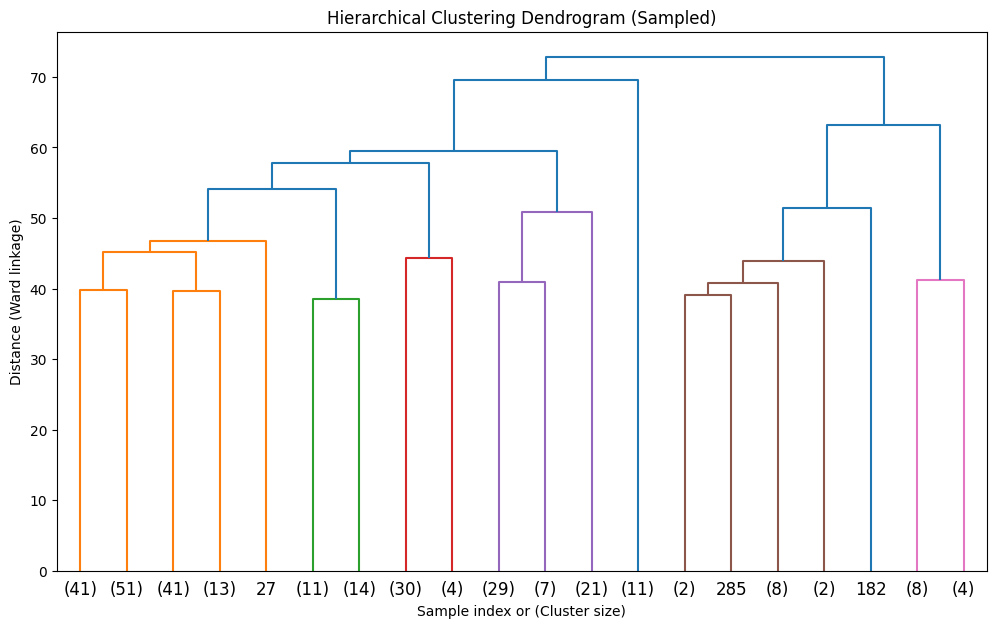


Inspect the dendrogram to decide on the number of clusters for Hierarchical Clustering.


In [20]:

# --- 7. Hierarchical Clustering (Agglomerative) ---
print("\n--- Hierarchical Clustering ---")
# Plotting the dendrogram (can be computationally intensive for large datasets)
# Consider using a subset if X_train_scaled is too large for dendrogram visualization
sample_size_for_dendrogram = min(len(X_train_scaled), 300) # e.g. 150 samples for dendrogram
if len(X_train_scaled) > sample_size_for_dendrogram:
    print(f"Note: Dendrogram will be plotted for a sample of {sample_size_for_dendrogram} segments due to size.")
    sample_indices = np.random.choice(X_train_scaled.shape[0], sample_size_for_dendrogram, replace=False)
    X_train_sample_for_dendrogram = X_train_scaled[sample_indices]
else:
    X_train_sample_for_dendrogram = X_train_scaled

linked = linkage(X_train_sample_for_dendrogram, method='ward') # 'ward', 'complete', 'average'

plt.figure(figsize=(12, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,
            truncate_mode='lastp', # Show only the last p merged clusters
            p=20 # Show the last 20 merges (adjust for clarity)
          )
plt.title('Hierarchical Clustering Dendrogram (Sampled)')
plt.xlabel("Sample index or (Cluster size)")
plt.ylabel("Distance (Ward linkage)")
plt.show(block=False) # Use block=False if running in a script to continue execution

print("\nInspect the dendrogram to decide on the number of clusters for Hierarchical Clustering.")

# To make the plot visible if script finishes too fast
plt.show()

In [21]:
# For this example, let's assume you decide on 3 clusters based on the dendrogram or other criteria.
# Or use the number of unique labels from your labeled data.
final_k_hierarchical = 8 #len(label_df_3['majority_label_3'].unique()) # Or your chosen k
print(f"Assuming you choose k={final_k_hierarchical} for Hierarchical Clustering based on the dendrogram or other criteria.")

agg_clustering = AgglomerativeClustering(n_clusters=final_k_hierarchical, linkage='ward')
train_df['hierarchical_cluster'] = agg_clustering.fit_predict(X_train_scaled)

hierarchical_segments_to_label = get_segments_for_manual_labeling(train_df[['segment_id', 'hierarchical_cluster']].copy(), train_df['hierarchical_cluster'])
print("\nHierarchical Clustering: Segments for Manual Labeling (segment_id by cluster):")

# os.mkdir("HIE")
# for cluster_id, seg_ids in hierarchical_segments_to_label.items():
#     print(f"  Cluster {cluster_id}: {seg_ids}")
#     os.mkdir(f"HIE/{cluster_id}")
#     for seg_id in seg_ids:
#         filepath = segment_id_to_filepath(seg_id)
#         os.system(f"cp {filepath} HIE/{cluster_id}")

Assuming you choose k=8 for Hierarchical Clustering based on the dendrogram or other criteria.

Hierarchical Clustering: Segments for Manual Labeling (segment_id by cluster):


In [42]:
# %%capture
# !mkdir /content/drive/MyDrive/data/reference_cluster
# !cp -r kmean /content/drive/MyDrive/data/reference_cluster
# !cp -r GMM /content/drive/MyDrive/data/reference_cluster
# !cp -r HIE /content/drive/MyDrive/data/reference_cluster
# !zip -r /content/drive/MyDrive/data/reference_cluster.zip /content/drive/MyDrive/data/reference_cluster

## Manually assign label for cluster

In [22]:
# K-Means: Segments for Manual Labeling (segment_id by cluster):
#   Cluster 0: ['20211007-SP05F_clip_3069_3074', '20230310-SP05F_clip_730_735', '20211007-SP03M_clip_3375_3380']
#   Cluster 1: ['20210616-SP01F_clip_759_764', '20211119-SP02F_clip_915_920', '20220722-SP01F_clip_2055_2060']
#   Cluster 2: ['20220916-SP05F_clip_285_290', '20210616-SP04F_clip_2967_2972', '20210616-SP02F_clip_849_854']
#   Cluster 3: ['20210504-SP01F_clip_222_227', '20210616-SP01F_clip_2925_2930', '20210323-SP03M_clip_72_77']
#   Cluster 4: ['20210504-SP09M_clip_282_287', '20211119-SP01F_clip_1341_1346', '20220722-SP02F_clip_666_671']
#   Cluster 5: ['20220610-SP07F_clip_762_767', '20220610-SP02F_clip_1128_1133', '20220204-SP02F_clip_2553_2558']
#   Cluster 6: ['20220204-SP07F_clip_1401_1406', '20210323-SP03M_clip_3_8', '20221209-SP07F_clip_550_555']
#   Cluster 7: ['20220916-SP01F_clip_350_355', '20220916-SP05F_clip_200_205', '20230310-SP03M_clip_190_195']
#   Cluster 8: ['20210616-SP03M_clip_969_974', '20211007-SP03M_clip_3085_3090', '20221209-SP09M_clip_845_850']
#   Cluster 9: ['20230310-SP03M_clip_165_170', '20230310-SP05F_clip_820_825', '20230310-SP02F_clip_690_695']
#   Cluster 10: ['20211007-SP07F_clip_3057_3062', '20220722-SP04F_clip_1605_1610', '20220916-SP01F_clip_755_760']
kmeans_cluster_engagement_map = {
    0: "Intermittent engagement",
    1: "Active engagement",
    2: "Active engagement",
    3: "Active engagement",
    4: "Active engagement",
    5: "Active engagement",
    6: "Disengagement",
    7: "Intermittent engagement",
    8: "Disengagement",
    9: "Intermittent engagement",
    10: "Intermittent engagement",
}

# GMM: Segments for Manual Labeling (segment_id by cluster):
#   Cluster 0: ['20220204-SP07F_clip_1308_1313', '20220722-SP07F_clip_1305_1310', '20220204-SP07F_clip_1578_1583']
#   Cluster 1: ['20210616-SP01F_clip_759_764', '20211119-SP02F_clip_162_167', '20220722-SP02F_clip_1281_1286']
#   Cluster 2: ['20220722-SP07F_clip_1368_1373', '20211007-SP01F_clip_3093_3098', '20220610-SP02F_clip_516_521']
#   Cluster 3: ['20221209-SP01F_clip_2725_2730', '20220722-SP07F_clip_492_497', '20210616-SP03M_clip_972_977']
#   Cluster 4: ['20230310-SP03M_clip_190_195', '20221209-SP09M_clip_855_860', '20221209-SP02F_clip_0_5']

gmm_cluster_engagement_map = {
    0: "Disengagement",
    1: "Active engagement",
    2: "Intermittent engagement",
    3: "Intermittent engagement",
    4: "Intermittent engagement",
}

# Hierarchical Clustering: Segments for Manual Labeling (segment_id by cluster):
#   Cluster 0: ['20230310-SP02F_clip_360_365', '20221209-SP07F_clip_550_555', '20221209-SP07F_clip_2805_2810']
#   Cluster 1: ['20220610-SP03M_clip_45_50', '20211007-SP07F_clip_3057_3062', '20210616-SP04F_clip_2160_2165']
#   Cluster 2: ['20210504-SP01F_clip_222_227', '20211007-SP03M_clip_2870_2875', '20211007-SP07F_clip_2652_2657']
#   Cluster 3: ['20211119-SP05F_clip_1170_1175', '20211007-SP05F_clip_2937_2942', '20220916-SP03M_clip_725_730']
#   Cluster 4: ['20220722-SP02F_clip_255_260', '20221209-SP06M_clip_3015_3020', '20220916-SP01F_clip_650_655']
#   Cluster 5: ['20230310-SP02F_clip_690_695', '20220204-SP07F_clip_1404_1409']
#   Cluster 6: ['20230310-SP06M_clip_1520_1525', '20230310-SP07F_clip_485_490', '20230310-SP03M_clip_40_45']
#   Cluster 7: ['20230310-SP01F_clip_885_890', '20230310-SP01F_clip_940_945', '20230310-SP04F_clip_1425_1430']
hierarchical_cluster_engagement_map = {
    0: "Disengagement",
    1: "Active engagement",
    2: "Intermittent engagement",
    3: "Active engagement",
    4: "Active engagement",
    5: "Disengagement",
    6: "Intermittent engagement",
    7: "Active engagement",
}


 EVALUATION METHOD 1: DIRECT CLUSTER ASSIGNMENT FOR TEST DATA

--- Evaluation: K-Means (Direct Assignment) ---
Accuracy: 0.4719
Classification Report:
                         precision    recall  f1-score   support

      Active engagement       0.51      0.82      0.63        44
          Disengagement       0.33      0.06      0.10        17
Intermittent engagement       0.33      0.18      0.23        28

               accuracy                           0.47        89
              macro avg       0.39      0.35      0.32        89
           weighted avg       0.42      0.47      0.40        89

Confusion Matrix:
[[36  1  7]
 [13  1  3]
 [22  1  5]]


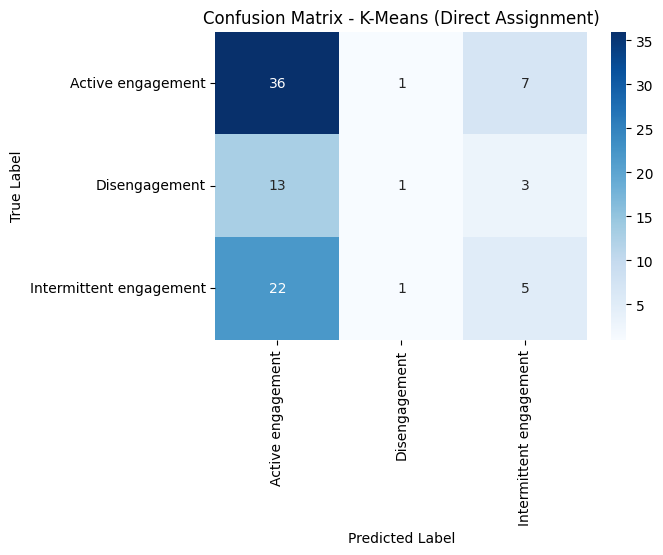


--- Evaluation: GMM (Direct Assignment) ---
Accuracy: 0.3146
Classification Report:
                         precision    recall  f1-score   support

      Active engagement       0.00      0.00      0.00        44
          Disengagement       0.00      0.00      0.00        17
Intermittent engagement       0.31      1.00      0.48        28

               accuracy                           0.31        89
              macro avg       0.10      0.33      0.16        89
           weighted avg       0.10      0.31      0.15        89

Confusion Matrix:
[[ 0  0 44]
 [ 0  0 17]
 [ 0  0 28]]


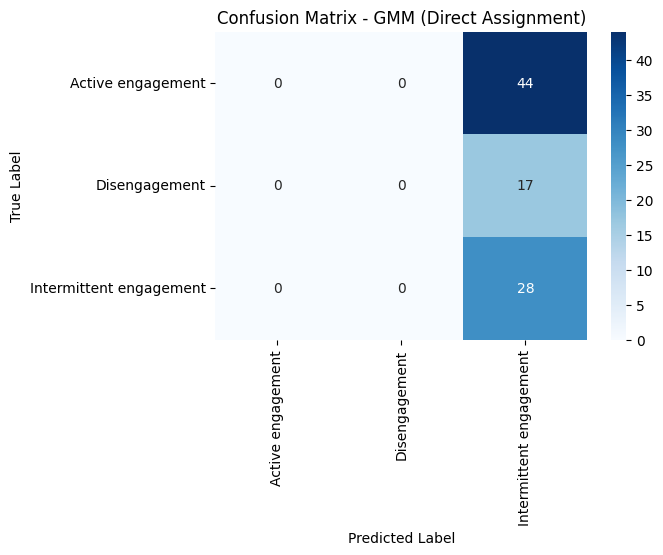


--- Evaluation: Hierarchical (Direct via k-NN) ---
Accuracy: 0.3483
Classification Report:
                         precision    recall  f1-score   support

      Active engagement       1.00      0.02      0.04        44
          Disengagement       0.67      0.12      0.20        17
Intermittent engagement       0.33      1.00      0.50        28

               accuracy                           0.35        89
              macro avg       0.67      0.38      0.25        89
           weighted avg       0.73      0.35      0.22        89

Confusion Matrix:
[[ 1  1 42]
 [ 0  2 15]
 [ 0  0 28]]


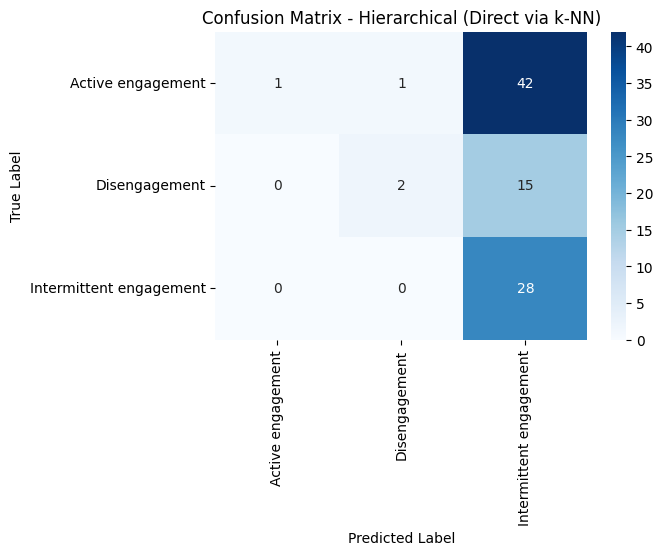

In [23]:

actual_engagement_labels = sorted(label_df_3['majority_label_3'].unique())

def extract_and_combine_features_eval(df, feature_cols): # Renamed to avoid clash if re-running cells
        feature_dfs = []
        for col in feature_cols:
            expanded_features = pd.DataFrame(df[col].tolist(), index=df.index).add_prefix(f'{col}_')
            feature_dfs.append(expanded_features)
        return pd.concat(feature_dfs, axis=1).apply(pd.to_numeric, errors='coerce').fillna(0)

# --- 2. Apply Mappings to Training Data (Create Pseudo-Labels) ---
train_df['kmeans_pseudo_label'] = train_df['kmeans_cluster'].map(kmeans_cluster_engagement_map)
train_df['gmm_pseudo_label'] = train_df['gmm_cluster'].map(gmm_cluster_engagement_map)
train_df['hierarchical_pseudo_label'] = train_df['hierarchical_cluster'].map(hierarchical_cluster_engagement_map)

# --- 3. Prepare Test Data Features ---
X_test_features = extract_and_combine_features_eval(test_df, target_feature_columns) # Use the same helper
X_test_scaled = scaler.transform(X_test_features) # Use the scaler fitted on training data

# Merge true labels into test_df for easy comparison
test_df_eval = test_df.merge(label_df_3[['segment_id', 'majority_label_3']], on='segment_id', how='left')
y_true_test = test_df_eval['majority_label_3']


# --- Helper function for printing evaluation results ---
def print_evaluation(y_true, y_pred, title, labels_order):
    print(f"\n--- Evaluation: {title} ---")
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred, labels=labels_order, zero_division=0))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred, labels=labels_order)
    print(cm)

    # Plotting confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_order, yticklabels=labels_order)
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show(block=False)

# --- 4. Evaluation Method 1: Direct Cluster Assignment for Test Data ---
print("\n===================================================================")
print(" EVALUATION METHOD 1: DIRECT CLUSTER ASSIGNMENT FOR TEST DATA")
print("===================================================================")

# K-Means (Method 1)
test_kmeans_cluster_ids = kmeans_final.predict(X_test_scaled)
y_pred_kmeans_m1 = pd.Series(test_kmeans_cluster_ids).map(kmeans_cluster_engagement_map)
print_evaluation(y_true_test, y_pred_kmeans_m1, "K-Means (Direct Assignment)", actual_engagement_labels)

# GMM (Method 1)
test_gmm_cluster_ids = gmm_final.predict(X_test_scaled)
y_pred_gmm_m1 = pd.Series(test_gmm_cluster_ids).map(gmm_cluster_engagement_map)
print_evaluation(y_true_test, y_pred_gmm_m1, "GMM (Direct Assignment)", actual_engagement_labels)

# Hierarchical (Method 1 - using k-NN to assign test data to training clusters)
# Train a k-NN classifier on the training data's cluster assignments
knn_hierarchical = KNeighborsClassifier(n_neighbors=5) # You can tune n_neighbors
knn_hierarchical.fit(X_train_scaled, train_df['hierarchical_cluster'])
test_hierarchical_cluster_ids = knn_hierarchical.predict(X_test_scaled)
y_pred_hierarchical_m1 = pd.Series(test_hierarchical_cluster_ids).map(hierarchical_cluster_engagement_map)
print_evaluation(y_true_test, y_pred_hierarchical_m1, "Hierarchical (Direct via k-NN)", actual_engagement_labels)

# Keep plots visible
plt.show()


--- Method 1: Classifier-Based Feature Importance (Random Forest) ---

Calculating Random Forest feature importance for K-Means clusters...


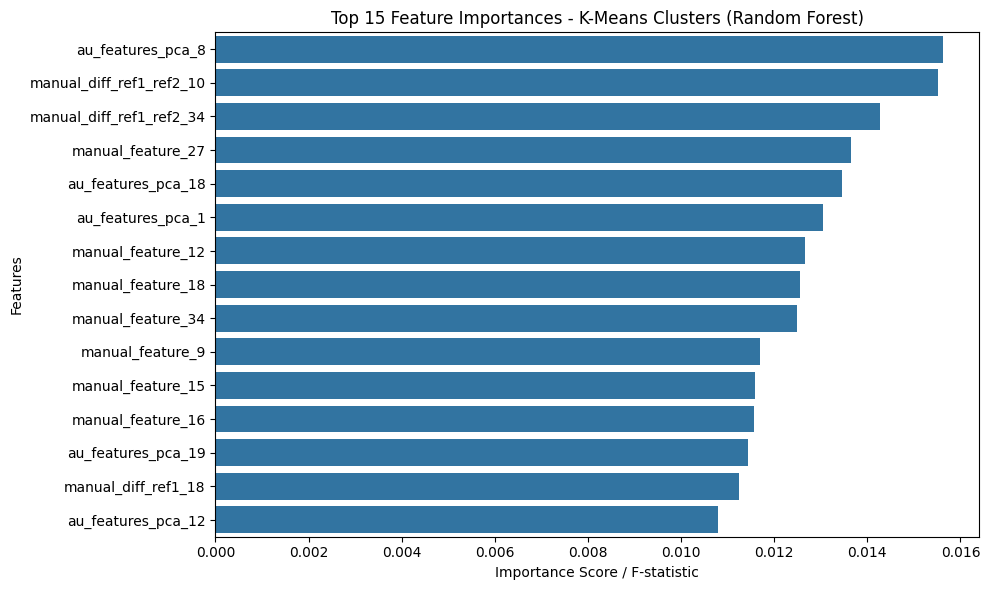

Top features for K-Means (Random Forest):
au_features_pca_8           0.015620
manual_diff_ref1_ref2_10    0.015518
manual_diff_ref1_ref2_34    0.014281
manual_feature_27           0.013643
au_features_pca_18          0.013449
au_features_pca_1           0.013050
manual_feature_12           0.012652
manual_feature_18           0.012544
manual_feature_34           0.012495
manual_feature_9            0.011692
manual_feature_15           0.011588
manual_feature_16           0.011576
au_features_pca_19          0.011436
manual_diff_ref1_18         0.011236
au_features_pca_12          0.010782
dtype: float64


Calculating Random Forest feature importance for GMM clusters...


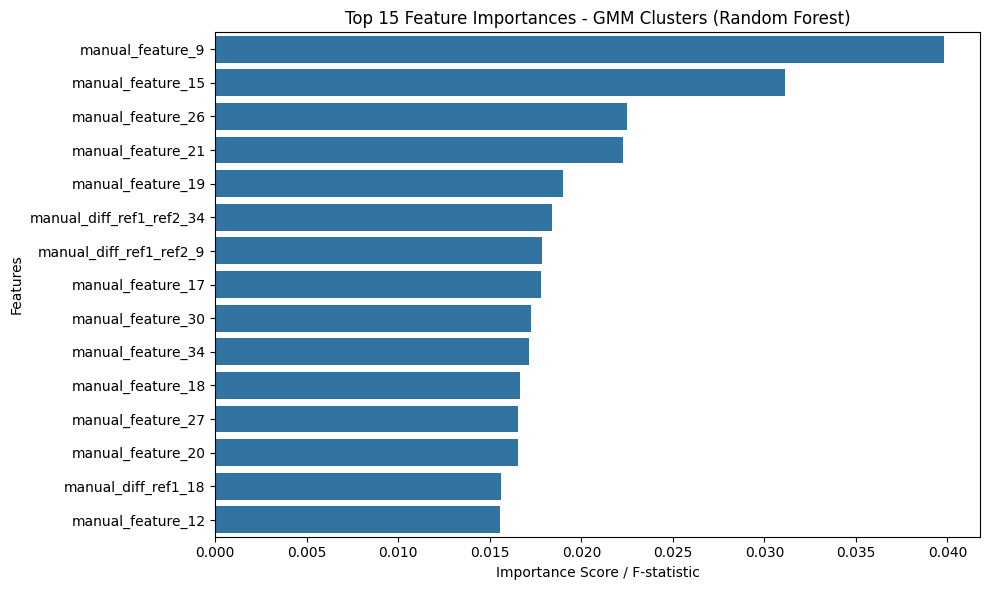

Top features for GMM (Random Forest):
manual_feature_9            0.039788
manual_feature_15           0.031141
manual_feature_26           0.022516
manual_feature_21           0.022287
manual_feature_19           0.019000
manual_diff_ref1_ref2_34    0.018400
manual_diff_ref1_ref2_9     0.017834
manual_feature_17           0.017798
manual_feature_30           0.017258
manual_feature_34           0.017147
manual_feature_18           0.016644
manual_feature_27           0.016558
manual_feature_20           0.016558
manual_diff_ref1_18         0.015591
manual_feature_12           0.015542
dtype: float64


Calculating Random Forest feature importance for Hierarchical clusters...


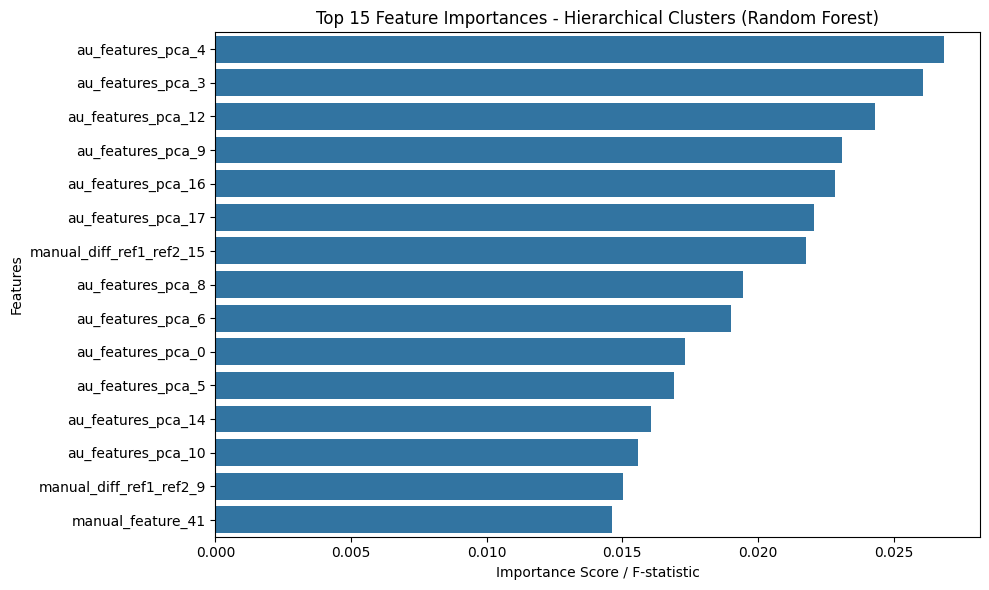

Top features for Hierarchical (Random Forest):
au_features_pca_4           0.026840
au_features_pca_3           0.026084
au_features_pca_12          0.024299
au_features_pca_9           0.023094
au_features_pca_16          0.022828
au_features_pca_17          0.022080
manual_diff_ref1_ref2_15    0.021763
au_features_pca_8           0.019444
au_features_pca_6           0.019010
au_features_pca_0           0.017295
au_features_pca_5           0.016895
au_features_pca_14          0.016043
au_features_pca_10          0.015574
manual_diff_ref1_ref2_9     0.015015
manual_feature_41           0.014626
dtype: float64



--- Method 2: ANOVA F-statistic based Feature Importance ---

Calculating ANOVA F-statistic for K-Means clusters...


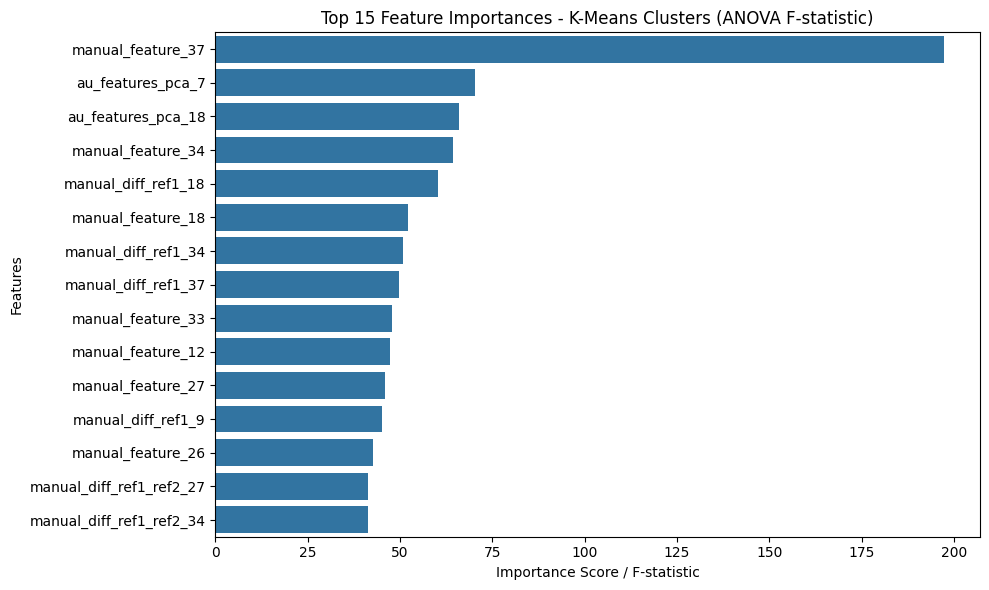

Top features for K-Means (ANOVA F-statistic):
manual_feature_37           197.218370
au_features_pca_7            70.222326
au_features_pca_18           65.926175
manual_feature_34            64.353818
manual_diff_ref1_18          60.196518
manual_feature_18            52.219249
manual_diff_ref1_34          50.946169
manual_diff_ref1_37          49.627317
manual_feature_33            47.733544
manual_feature_12            47.295974
manual_feature_27            46.019065
manual_diff_ref1_9           45.112687
manual_feature_26            42.695523
manual_diff_ref1_ref2_27     41.325233
manual_diff_ref1_ref2_34     41.318357
dtype: float64


Calculating ANOVA F-statistic for GMM clusters...


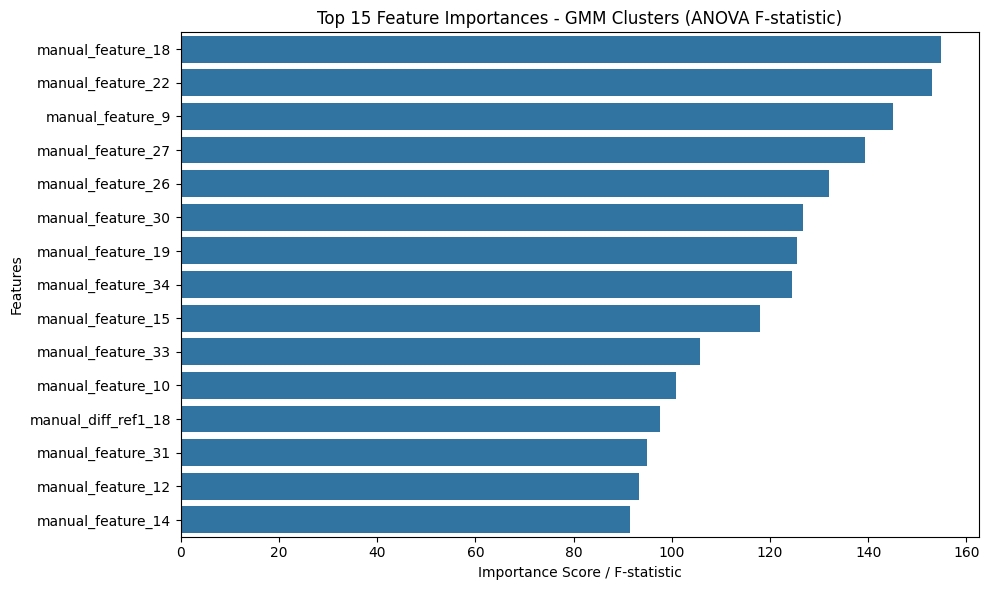

Top features for GMM (ANOVA F-statistic):
manual_feature_18      154.748534
manual_feature_22      152.927591
manual_feature_9       145.099496
manual_feature_27      139.336617
manual_feature_26      131.932464
manual_feature_30      126.811906
manual_feature_19      125.565163
manual_feature_34      124.451910
manual_feature_15      117.898828
manual_feature_33      105.817734
manual_feature_10      100.913146
manual_diff_ref1_18     97.652575
manual_feature_31       94.862356
manual_feature_12       93.251601
manual_feature_14       91.466978
dtype: float64


Calculating ANOVA F-statistic for Hierarchical clusters...


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_base.py:3024: RuntimeWarning: overflow encountered in scalar add
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


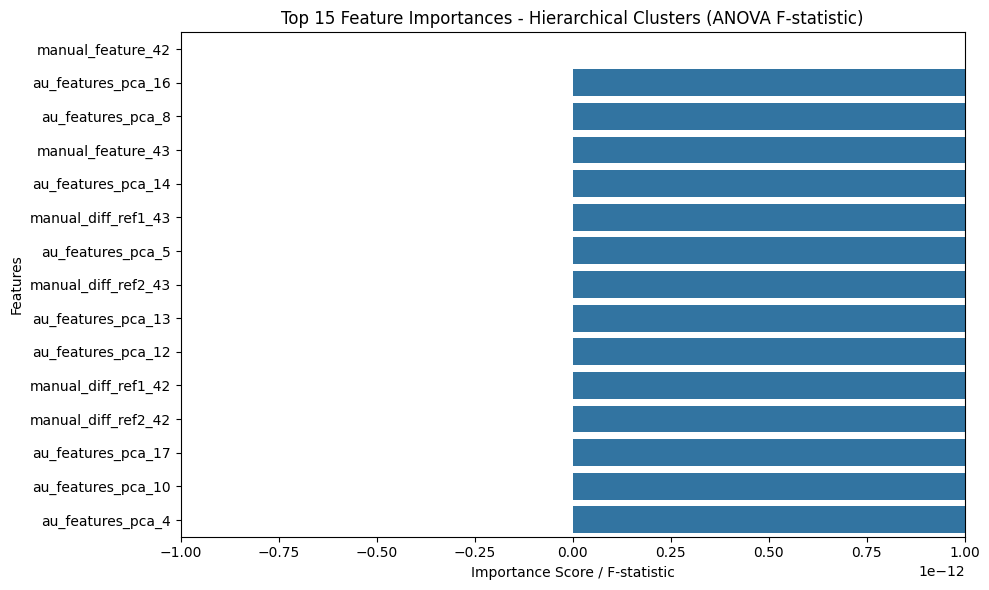

Top features for Hierarchical (ANOVA F-statistic):
manual_feature_42      1.797693e+308
au_features_pca_16      3.940460e+02
au_features_pca_8       3.145102e+02
manual_feature_43       3.048063e+02
au_features_pca_14      2.585856e+02
manual_diff_ref1_43     2.557626e+02
au_features_pca_5       1.966917e+02
manual_diff_ref2_43     1.917321e+02
au_features_pca_13      1.876384e+02
au_features_pca_12      1.385521e+02
manual_diff_ref1_42     1.366273e+02
manual_diff_ref2_42     1.321562e+02
au_features_pca_17      1.282070e+02
au_features_pca_10      1.189429e+02
au_features_pca_4       1.178501e+02
dtype: float64



In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif # For ANOVA F-values

# --- Helper function to plot feature importances ---
def plot_feature_importances(importances, names, title, top_n=15):
    feature_importances = pd.Series(importances, index=names)
    sorted_importances = feature_importances.sort_values(ascending=False)

    plt.figure(figsize=(10, max(6, top_n * 0.3))) # Adjust height based on top_n
    sns.barplot(x=sorted_importances.head(top_n).values, y=sorted_importances.head(top_n).index)
    plt.title(f'Top {top_n} Feature Importances - {title}')
    plt.xlabel('Importance Score / F-statistic')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show(block=False)
    return sorted_importances.head(top_n)

# --- 1. Classifier-Based Feature Importance (Random Forest) ---
print("\n--- Method 1: Classifier-Based Feature Importance (Random Forest) ---")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
feature_names = X_test_features.columns.tolist()
cluster_methods_for_importance = {
    "K-Means": "kmeans_cluster",
    "GMM": "gmm_cluster",
    "Hierarchical": "hierarchical_cluster"
}

for method_name, cluster_col in cluster_methods_for_importance.items():
    print(f"\nCalculating Random Forest feature importance for {method_name} clusters...")
    if cluster_col not in train_df.columns:
        print(f"Cluster column '{cluster_col}' not found in train_df. Skipping {method_name}.")
        continue

    y_clusters = train_df[cluster_col]

    # Ensure there's more than one class for the classifier
    if len(y_clusters.unique()) < 2:
        print(f"Skipping {method_name} as it has only one cluster label.")
        continue

    rf_classifier.fit(X_train_scaled, y_clusters)
    importances = rf_classifier.feature_importances_
    top_rf_features = plot_feature_importances(importances, feature_names, f"{method_name} Clusters (Random Forest)")
    print(f"Top features for {method_name} (Random Forest):\n{top_rf_features}\n")


# --- 2. ANOVA F-statistic based Feature Importance ---
print("\n\n--- Method 2: ANOVA F-statistic based Feature Importance ---")
# ANOVA F-value expects non-negative values for scores if using SelectKBest, but f_classif returns F-stats directly.
# The F-statistic itself is the measure of importance.

for method_name, cluster_col in cluster_methods_for_importance.items():
    print(f"\nCalculating ANOVA F-statistic for {method_name} clusters...")
    if cluster_col not in train_df.columns:
        print(f"Cluster column '{cluster_col}' not found in train_df. Skipping {method_name}.")
        continue

    y_clusters = train_df[cluster_col]

    if len(y_clusters.unique()) < 2:
        print(f"Skipping {method_name} as it has only one cluster label for ANOVA.")
        continue

    # f_classif returns F-statistics and p-values
    # We are interested in F-statistics; higher is better.
    f_values, p_values = f_classif(X_train_scaled, y_clusters)

    # Handle potential NaN F-values (e.g., if a feature has zero variance within groups)
    f_values = np.nan_to_num(f_values, nan=0.0)

    top_anova_features = plot_feature_importances(f_values, feature_names, f"{method_name} Clusters (ANOVA F-statistic)")
    print(f"Top features for {method_name} (ANOVA F-statistic):\n{top_anova_features}\n")


# Keep plots visible if script finishes execution
plt.show()